# Burning calories with machine learning

In this project I will be using a supervised learning method along with an ensemble model to predict calories being burnt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Quick EDA

Overview of the data and its types

In [3]:
df = pd.read_csv('calories.csv')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
df.info()
df.duplicated().sum()
# no null values or duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


0

# Data distribution

We'll be looking at how the data is distributed between male and females and the relationship between calories being burned and duration of excersize

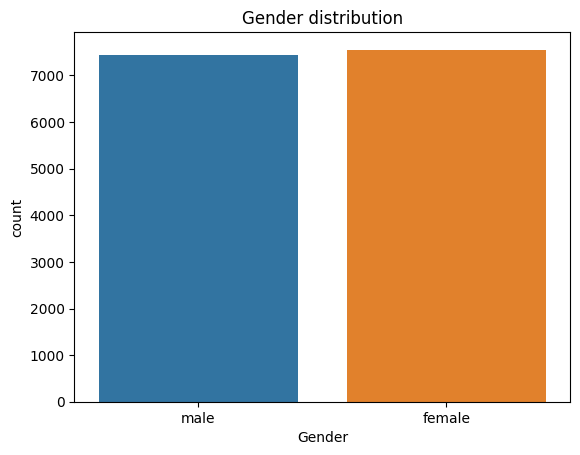

In [5]:
# plot distribution by gender
sns.countplot(x='Gender', data=df, hue='Gender')
plt.title('Gender distribution')
plt.show()

Balanced between both genders

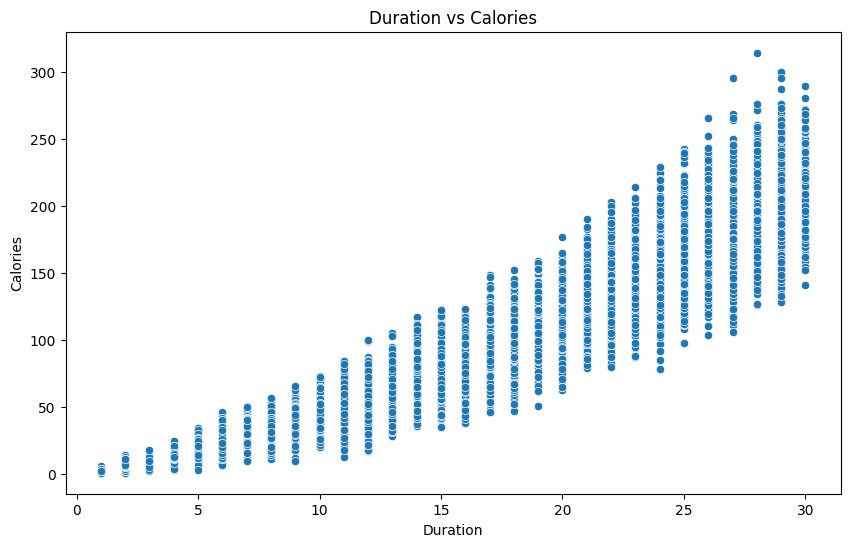

In [6]:
# looking for a relationship between duration and calories column
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration', y='Calories')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.title('Duration vs Calories')
plt.show()

Positive relationship between duration and calories

# Implementing multiple linear regression

In [7]:
# Define feautures and target along with training and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['Height', 'Weight', 'Heart_Rate']]
y = df['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

# Model Results

In [8]:
#Evaluate our model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 753.7276970211414
R-squared: 0.8132391870951742


**Evaluating our metrics**

R-squared - the value of the the R-squared metric indicates how well the model being used fits the data with the value being close to 1 this means the models fits well

MSE - the value of the mse indicates how close our regression line is to our data points the smaller it is the better this models predictive accuracy


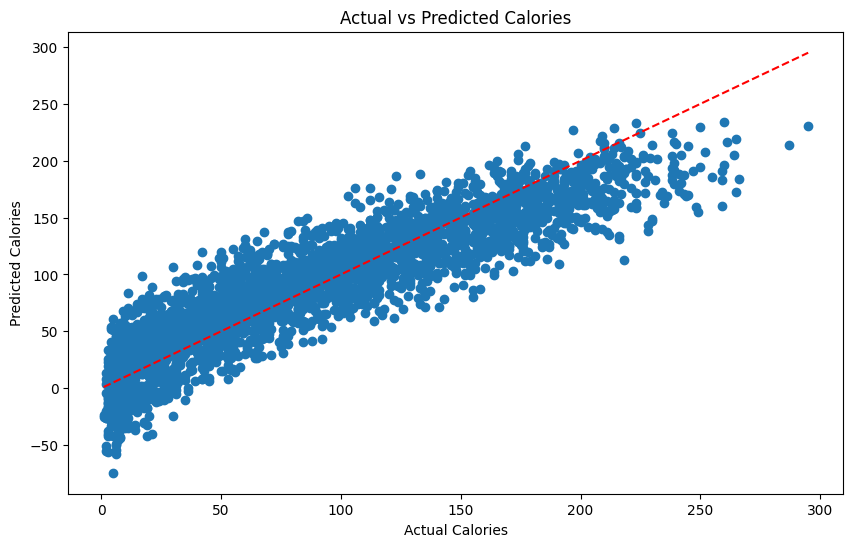

In [9]:
# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')
plt.show()

With all the data points being clustered around the line this means that the predictions were accurate

# Comparing with Random Forests


In [10]:
# import Random Forests
from sklearn.ensemble import RandomForestRegressor

# new features
X = df[['Height', 'Weight', 'Heart_Rate']]
y = df['Calories']

In [11]:
# using 75% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# instantiate, fit, predict
rfr = RandomForestRegressor(n_estimators=50, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Model Results

In [14]:
rfr_mse = mean_squared_error(y_test, y_pred)
rfr_r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', rfr_mse)
print('R-squared:', rfr_r2)

Mean Squared Error: 783.2932149472344
R-squared: 0.8022526986230797


When comparing the metrics to the first model it is rather close

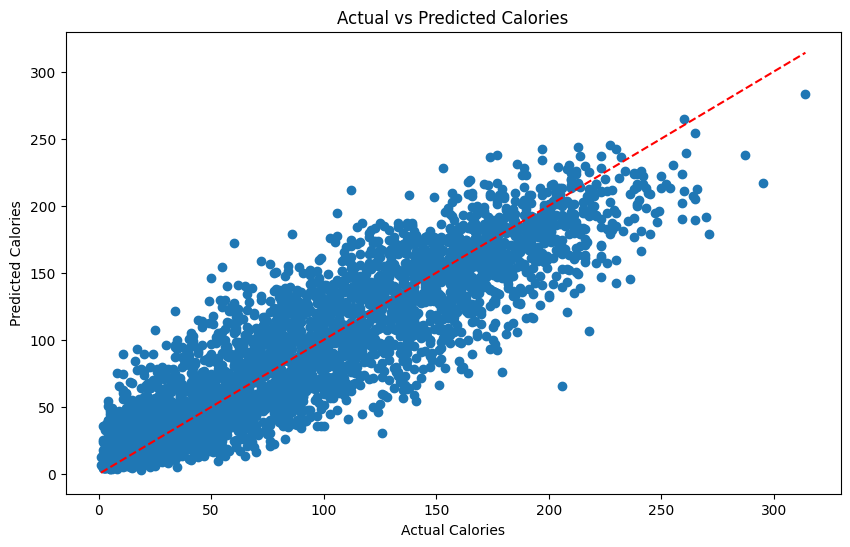

In [12]:
# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')
plt.show()